In [46]:
import pandas as pd
from scipy.stats import chi2_contingency
import re
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

In [35]:
data = pd.read_csv('data_res.csv', index_col = 0)

In [37]:
data = data.dropna(subset='업종분류')

In [38]:
data['수요'] = data['업종분류'].apply(lambda x: 1 if data['업종분류'].value_counts()[x] > 3 else 0)
data.isna().sum()

기업명                0
업종분류               0
사원수              922
설립연도               0
기업형태             815
매출액              165
주소                 8
직무                 0
자격요건              19
직급                 0
이용하는기술스택/우대사항      7
해당 페이지 URL         0
기업 홈페이지 URL       33
수요                 0
dtype: int64

<Axes: xlabel='수요', ylabel='count'>

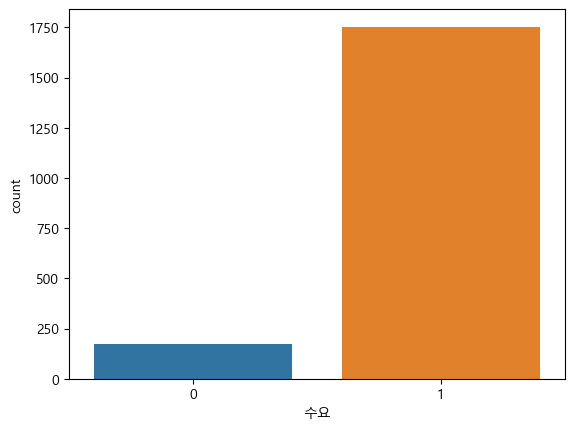

In [47]:
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
sns.countplot(x = data['수요'])

In [48]:
# contingency_table = pd.crosstab(data['수요'], data[ 이 부분 수정하시면 됩니다.])

contingency_table = pd.crosstab(data['수요'], data['사원수'])
display(contingency_table)
chi2 , p_value , _, _= chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)
alpha = 0.05

if p_value < alpha:
    print("귀무가설 기각. \n통계적으로 유의미한 연관성이 있다.")
else:
    print("귀무가설 기각할 수 없음. \n통계적으로 유의미한 연관성이 없다.")

사원수,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,1354.0,1441.0,1694.0,1766.0,2011.0,2175.0,2240.0,2867.0,3585.0,6962.0
수요,,,,,,,,,,,,,,,,,,,,,
0,0,6,3,3,2,0,0,3,3,0,...,0,3,3,0,1,1,3,0,0,0
1,39,21,23,19,27,17,25,20,15,29,...,32,0,0,25,0,0,1,7,2,3


Chi-square statistic: 417.8765682421834
P-value: 3.088469063842907e-33
귀무가설 기각. 
통계적으로 유의미한 연관성이 있다.


# 업종 분류별 수요가 높은 그룹의 특징

* 주소                  
>Chi-square statistic: 329.83904893681165                  
>P-value: 5.056018572498105e-36                    
>귀무가설 기각.                                      
>통계적으로 유의미한 연관성이 있다.

* 직급              
>Chi-square statistic: 19.762825656511534              
>P-value: 0.03157746933515181                      
>귀무가설 기각.                              
>통계적으로 유의미한 연관성이 있다.

* 사원수
>Chi-square statistic: 417.8765682421834                      
>P-value: 3.088469063842907e-33                            
>귀무가설 기각.                                  
>통계적으로 유의미한 연관성이 있다.

* 직무 
>Chi-square statistic: 251.45571518200796            
>P-value: 1.006600476331991e-21            
>귀무가설 기각.            
>통계적으로 유의미한 연관성이 있다.